## Introduction to Artificial Neural Networks (ANN) for Sonar Dataset

- **Inspiration and Design**: ANNs are inspired by biological neural networks in human brains, designed to recognize patterns and solve complex problems by learning from data.
- **Structure**: Consist of layers of interconnected nodes or "neurons," each performing simple computations.
- **Learning Process**: Through "learning," ANNs adjust their connections to improve performance on tasks like classification, regression, and more.

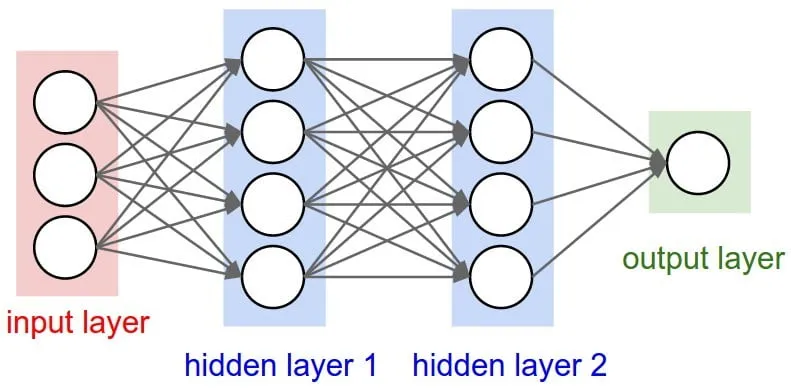

## Historical Background and Problem Statement

### The Challenge of Submarine Detection During World War II
- **Submarine Vulnerability**: Submarines played a crucial role in naval warfare but were vulnerable to enemy sonar detection, leading to losses.
- **Sonar Technology Development**: In response, new sonar technology was developed to detect and classify underwater objects, including submarines.


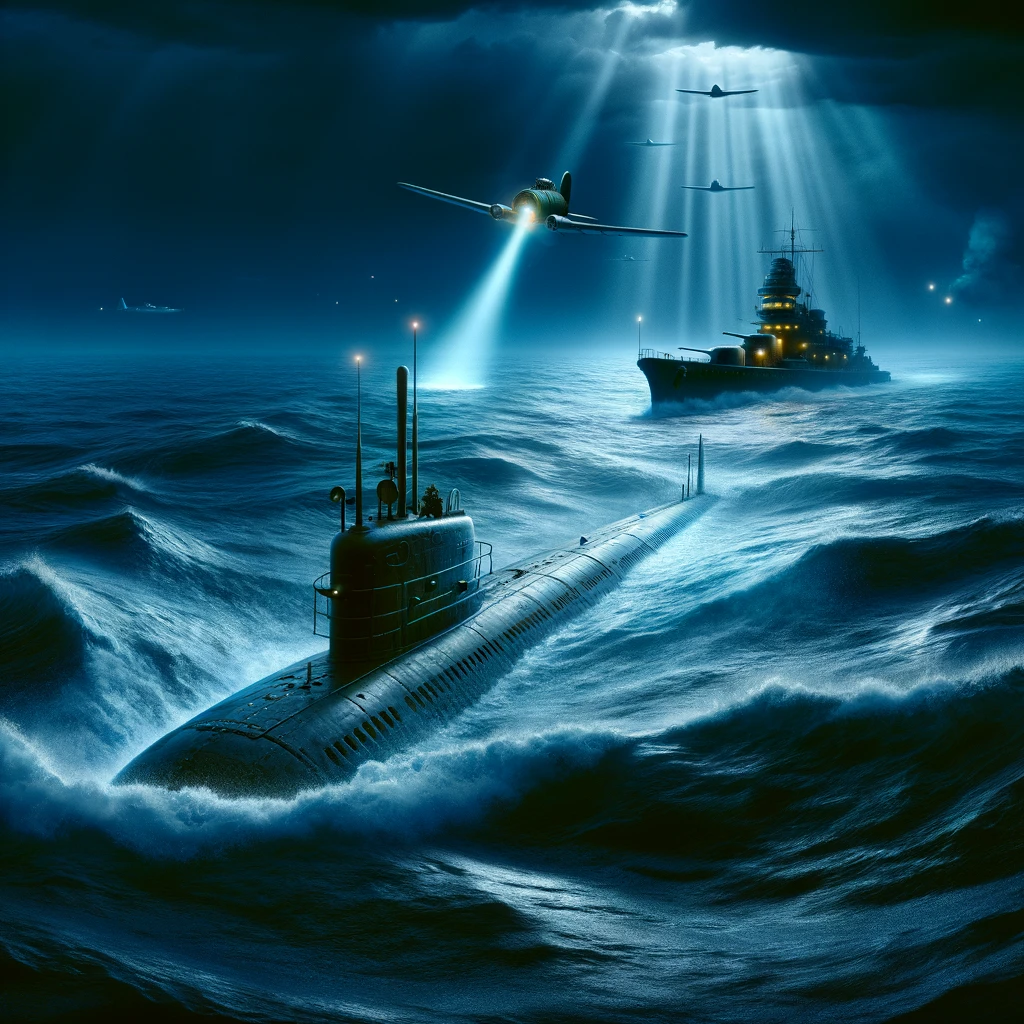

### Development of the Sonar Dataset
- **Dataset Origin**: The "Sonar Dataset" contains data from sonar signals bounced off metal cylinders (representing mines) and roughly cylindrical rocks.
- **Objective**: To build a binary classifier using an ANN model to distinguish between sonar signals reflected by mines and rocks.





### Modern Implications and Goals
- **Naval Operations**: The primary goal is to develop an ANN model to predict whether an object detected by sonar is a rock or a mine, enhancing naval operations and maritime security.
- **Dataset Utilization**: Utilizes the "Sonar Dataset" from the 1980s, collected by the Naval Underwater Systems Center, for developing and testing classification algorithms.
- **Submarine Safety and Navigation**: Accurate sonar signal classification helps submarines detect and avoid obstacles, ensuring safe underwater navigation.
- **Broader Applications**: Sonar technology's role extends to civilian uses such as underwater exploration, marine biology research, and environmental monitoring, where accurate classification algorithms are crucial.




## Project Focus

The focus of this project will be the **Sonar Mines vs Rocks dataset**. The problem is to predict metal or rock objects from sonar return data.

## Dataset Description

- Each pattern consists of a set of **60 numbers** in the range **0.0 to 1.0**.
- These numbers represent the energy within a particular frequency band, integrated over a certain period of time.
-  It contains 208 instances with 60 features representing sonar signal strengths at different angles, labeled as **'R' (rock) or 'M'(mine)**.


| Feature1 | Feature2 | Feature3 | ... | Feature60 | Label |
|----------|----------|----------|-----|-----------|-------|
| 0.02     | 0.0371   | 0.0428   | ... | 0.0084    | R     |
| 0.0453   | 0.0523   | 0.0843   | ... | 0.0090    | M     |
| 0.0262   | 0.0582   | 0.1099   | ... | 0.0032    | R     |
| ...      | ...      | ...      | ... | ...       | ...   |
| 0.0315   | 0.0251   | 0.0651   | ... | 0.0040    | M     |


## Label Information

- The label associated with each record contains:
  - **"R"** if the object is a **rock**.
  - **"M"** if it is a **mine** (metal cylinder).

- The numbers in the labels are in increasing order of aspect angle, but they do not encode the angle directly.

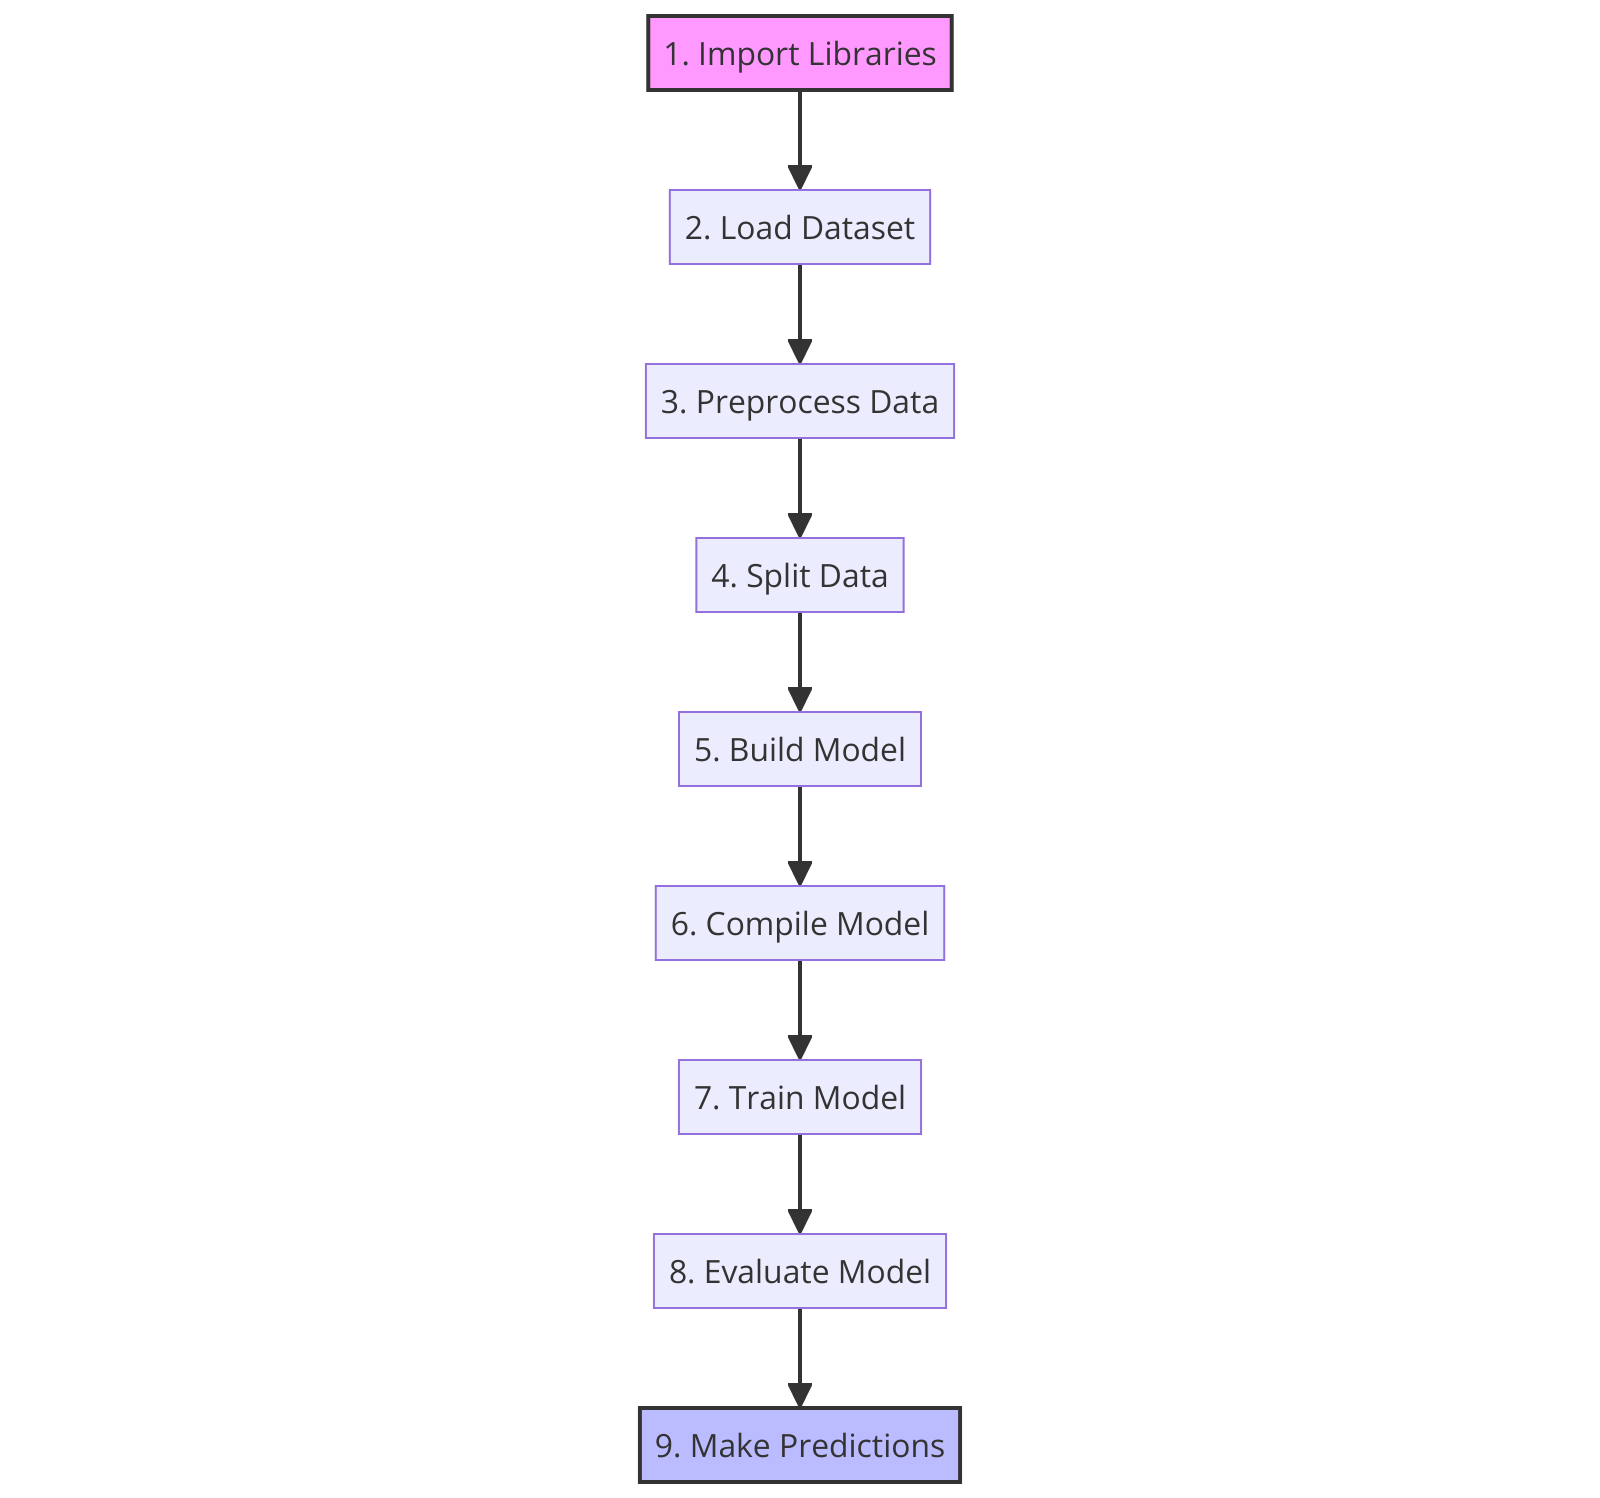

**Prerequisites:**

- Python 3.x
- NumPy
- pandas
- TensorFlow or Keras (install using `pip install tensorflow` or `pip install keras`)


**Steps:**

1. **Import Libraries and Load Data:**

In [1]:
# Import Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

2. **Read the dataset*:**


>  Read the 'sonar.csv' dataset into a pandas DataFrame called 'data'.

In [2]:
# Load dataset
data=pd.read_csv( "sonar.csv")

**Display the first few rows of the dataset**:
> This line displays the first five rows of the dataset using the head() method.

In [3]:
data.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock




**Display dataset information**:
> This line displays the dataset's information using the info() method.
Display dataset information:

This line displays the dataset's information using the info() method.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   attribute_1   208 non-null    float64
 1   attribute_2   208 non-null    float64
 2   attribute_3   208 non-null    float64
 3   attribute_4   208 non-null    float64
 4   attribute_5   208 non-null    float64
 5   attribute_6   208 non-null    float64
 6   attribute_7   208 non-null    float64
 7   attribute_8   208 non-null    float64
 8   attribute_9   208 non-null    float64
 9   attribute_10  208 non-null    float64
 10  attribute_11  208 non-null    float64
 11  attribute_12  208 non-null    float64
 12  attribute_13  208 non-null    float64
 13  attribute_14  208 non-null    float64
 14  attribute_15  208 non-null    float64
 15  attribute_16  208 non-null    float64
 16  attribute_17  208 non-null    float64
 17  attribute_18  208 non-null    float64
 18  attribute_19  208 non-null    

**Access the 'Class' column**:
> This line accesses the 'Class' column from the 'data' DataFrame.

In [5]:
# Access the 'Class' column
data['Class']

0      Rock
1      Rock
2      Rock
3      Rock
4      Rock
       ... 
203    Mine
204    Mine
205    Mine
206    Mine
207    Mine
Name: Class, Length: 208, dtype: object

In [6]:
data['Class'].value_counts()

Mine    111
Rock     97
Name: Class, dtype: int64

3. **Preprocess Data (Optional)**

   - Consider normalization or standardization if feature values have significantly different ranges.
     - **Standardize features:** Normalization often improves ANN performance. Use `StandardScaler` from scikit-learn:
   - Handle missing values if necessary (e.g., imputation or removal).

4. **Split the data into Features (Attributes: X) and Label (Class: Y)**:
> This line splits the data into features (X) and labels (Y) by selecting appropriate columns from the 'data' DataFrame. Use `train_test_split`

In [12]:
# Split the data into Features (Attributes: X) and Label (Class: Y)
x= data.iloc[:,0:60].values
y= data.iloc[:,60].values

**Feature Encoding**:
> This line encodes the class labels using a LabelEncoder to convert them into numerical values (0 and 1)

In [13]:
# Feature Encoding
encoder = LabelEncoder()
y = encoder.fit_transform(y)

**Splitting the dataset into Training and Test sets**:
> This line splits the dataset into training and test sets using train_test_split() with an 80-20 ratio.

In [14]:
# Splitting the dataset into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=100)

**Feature Scaling**:
> This line scales the features using StandardScaler to have a mean of 0 and a standard deviation of 1. This helps in improving the performance of the neural network model.

In [15]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Display the scaled training data**:
> This line displays the scaled training data using the X_train variable.

In [16]:
# Display the scaled training data
X_train

array([[-0.34890656, -0.36262452, -0.80450382, ...,  3.5654196 ,
         0.95865909, -0.81844993],
       [ 0.32840111,  3.85833824,  3.11796472, ...,  0.29137418,
         0.61677637,  0.08236353],
       [-0.40969058, -0.5104044 , -0.9649214 , ...,  0.3082507 ,
        -0.98467426, -0.21790762],
       ...,
       [ 0.34142625,  0.07455762, -0.2947899 , ..., -0.16429193,
         0.0409739 ,  0.08236353],
       [ 0.01579757,  0.81653575, -0.10591114, ...,  1.40522468,
         0.34686896, -1.05866685],
       [-0.28812254, -0.01164731,  0.13730261, ...,  0.27449766,
        -0.30090882, -0.838468  ]])

5. **Define the ANN Model:**

   - Use Keras' sequential API for a simple feedforward network.
   - Start with a single hidden layer (adjust later for experimentation) then add  3 hidden layers and a sigmoid activation function in the output layer for binary classification.
   - Use binary cross-entropy loss for binary classification and 'adam' optimizer:

In [17]:
# Create the Neural Network Model
model = Sequential()
model.add(Dense(60, input_dim=60, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

6. **Compile the ANN Model:**

compile the neural network model with the 'adam' optimizer, 'binary_crossentropy' loss function, and 'accuracy' metric.

In [18]:
# Compile the Model
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

7. **Train the Model:**

   - Fit the model to the training data, specifying epochs and monitoring loss and accuracy:

In [19]:
# Train the Model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

8. **Evaluate the Model:**

   - Calculate performance metrics on the test set:

In [20]:
# Evaluate the Model on Test Data
loss , accuracy = model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 11ms/step - loss: 0.4326 - accuracy: 0.9286


**Display the Model's Performance**

In [21]:
# Evaluate the model on the test data

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.43261978030204773
Test accuracy: 0.9285714030265808


9. **Make Predictions:**

   - Use the trained model to predict classes on new (unseen) data:
   - Use a threshold to classify the samples into classes.

In [22]:
# Make Predictions on Test Data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

2/2 [==============================] - 0s 6ms/step


##### **Display the Confusion Matrix**

In [23]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[25  3]
 [ 0 14]]


**Display the Classification Report** :
> This line generates and displays the classification report, including precision, recall, and F1-score, to provide a comprehensive evaluation of the model's performance.

In [24]:
# Display the Classification Report
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94        28
           1       0.82      1.00      0.90        14

    accuracy                           0.93        42
   macro avg       0.91      0.95      0.92        42
weighted avg       0.94      0.93      0.93        42



In [9]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 8.5 MB/s eta 0:00:00


In [10]:
import shap

In [34]:
 # Create a SHAP explainer object using the model and the training data
explainer = shap.Explainer(model,X_train)

In [35]:
# Compute SHAP values for the testing data
shap_values = explainer.shap_values(X_test)

In [38]:
# Define feature names
feature_names = [f'attribute_{i}' for i in range(1, 61)]

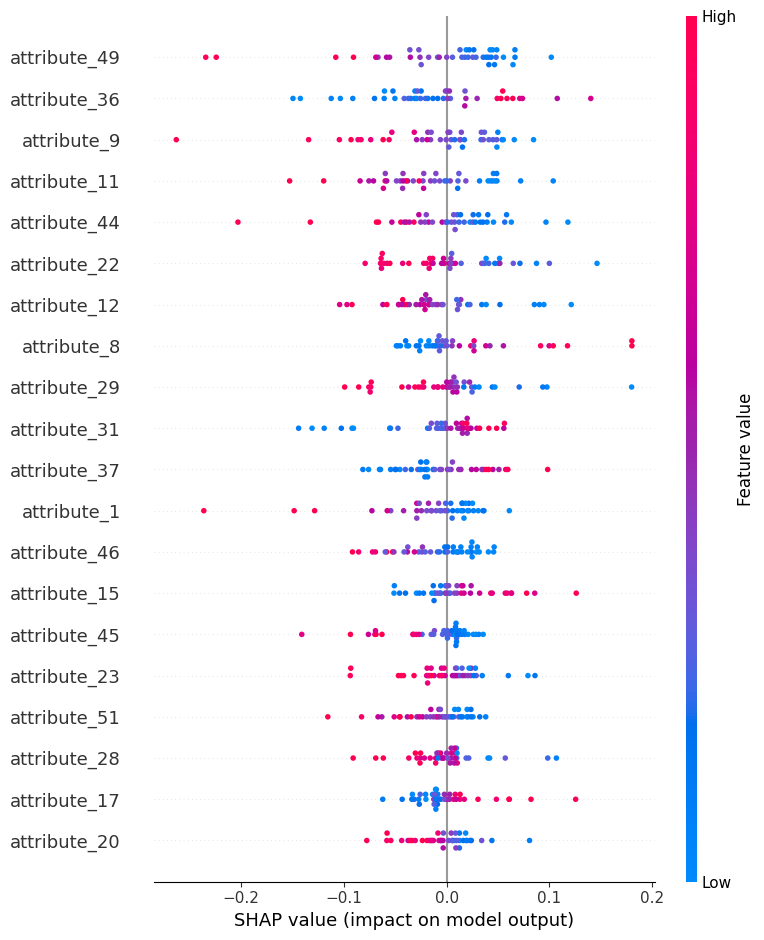

In [39]:
# Visualize the SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

The SHAP summary plot offers several key insights into the Sonar dataset model:

**Feature Importance**: The plot ranks features by their importance to the model's output. For instance, attribute_49 appears to be the most important feature, followed by attribute_36, attribute_9, and so on.

**Impact on Model Output**: The SHAP values on the x-axis indicate the impact of each feature on the model's output. A SHAP value to the right of the vertical zero line suggests a positive impact on the model prediction, while a value to the left suggests a negative impact.

**Feature Value**: The color of the dots represents the value of the feature for each instance, with blue indicating lower values and red indicating higher values. This color coding helps to understand how the value of a feature affects its impact on the prediction.

**Variability of Impact**: The spread of the dots for each feature shows the variability of its impact on the model output. A wider spread indicates that the feature's impact varies more across different instances.

**Direction of Impact**: Some features have a mix of positive and negative impacts on the model output (dots on both sides of the zero line), indicating that the direction of their impact depends on the context within the data.

**Overall Predictive Power**: The bar chart images show the mean absolute SHAP values for the top and bottom features, providing a clear indication of their overall predictive power within the model. Features with longer bars have a greater average impact on the model's predictions.

From these plots, stakeholders can determine which features are most influential in the model's predictions and may consider focusing on these for further analysis or for potential interventions.bold text



## Conclusion

The development of an ANN model to classify sonar signals not only has significant implications for military operations but also offers potential benefits for a wide range of civilian applications. The historical context underscores the importance of this technology in both past and present-day scenarios, highlighting the ongoing need for advancements in underwater detection and classification technologies.